### Instalar Bibliotecas

In [1]:
#!pip install duckdb
#!pip install pandas
#!pip install plotly
#!pip install matplotlib
#!pip install seaborn

### Importar Bibliotecas

In [2]:
import duckdb
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


### Importar Funções

In [3]:
#import lib.dadosaberto as da
#import lib.functions as f
#import lib.config as cfg


### Conecta no DuckDB

In [4]:
# Conecta abrindo / criando um arquivo
conn = duckdb.connect('./dados/empresa_br.db')

# Conecta na memória
comem = duckdb.connect()


### Executar Query

In [5]:
# Consultar as tabelas do schema main
query = '''
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'main';
    '''
conn.execute(query)

In [6]:
# Usando fetchone
result_one = conn.execute(query).fetchone()
print(type(result_one))
print("Retorna um registro:", result_one)
print('-'*80)

# Usando fetchall
result_all = conn.execute(query).fetchall()
print(type(result_all))
print("Retorna a lista dos registros:", result_all)
print('-'*80)

# Usando fetchdf
result_df = conn.execute(query).fetchdf()
print(type(result_df))
print("Retorna Data Frame")
result_df


<class 'tuple'>
Retorna um registro: ('bronze_cnae',)
--------------------------------------------------------------------------------
<class 'list'>
Retorna a lista dos registros: [('bronze_cnae',), ('bronze_empresa_0',), ('bronze_empresa_1',), ('bronze_empresa_2',), ('bronze_empresa_3',), ('bronze_empresa_4',), ('bronze_empresa_5',), ('bronze_empresa_6',), ('bronze_empresa_7',), ('bronze_empresa_8',), ('bronze_empresa_9',), ('bronze_estabelecimento_0',), ('bronze_estabelecimento_1',), ('bronze_estabelecimento_2',), ('bronze_estabelecimento_3',), ('bronze_estabelecimento_4',), ('bronze_estabelecimento_5',), ('bronze_estabelecimento_6',), ('bronze_estabelecimento_7',), ('bronze_estabelecimento_8',), ('bronze_estabelecimento_9',), ('bronze_motivo_situacao_cadastral',), ('bronze_municipio',), ('bronze_natureza_juridica',), ('bronze_pais',), ('bronze_qualificacao_socio',), ('bronze_simples',), ('bronze_socio_0',), ('bronze_socio_1',), ('bronze_socio_2',), ('bronze_socio_3',), ('bronze_soc

,table_name
0,bronze_cnae
1,bronze_empresa_0
2,bronze_empresa_1
3,bronze_empresa_2
4,bronze_empresa_3
5,bronze_empresa_4
6,bronze_empresa_5
7,bronze_empresa_6
8,bronze_empresa_7
9,bronze_empresa_8


### Select *

In [7]:
query = '''
    SELECT *
    FROM bronze_cnae
    '''
# com SELECT *
result_df = conn.execute(query).fetchdf()
result_df

,codigo,descricao
0,0111301,Cultivo de arroz
1,0111302,Cultivo de milho
2,0111303,Cultivo de trigo
3,0111399,Cultivo de outros cereais não especificados an...
4,0112101,Cultivo de algodão herbáceo
...,...,...
1354,9609208,Higiene e embelezamento de animais domésticos
1355,9609299,Outras atividades de serviços pessoais não esp...
1356,9700500,Serviços domésticos
1357,9900800,Organismos internacionais e outras instituiçõe...


In [8]:
query = '''
    FROM bronze_cnae
    '''
# Sem SELECT *
result_df = conn.execute(query).fetchdf()
result_df

,codigo,descricao
0,0111301,Cultivo de arroz
1,0111302,Cultivo de milho
2,0111303,Cultivo de trigo
3,0111399,Cultivo de outros cereais não especificados an...
4,0112101,Cultivo de algodão herbáceo
...,...,...
1354,9609208,Higiene e embelezamento de animais domésticos
1355,9609299,Outras atividades de serviços pessoais não esp...
1356,9700500,Serviços domésticos
1357,9900800,Organismos internacionais e outras instituiçõe...


### Group By All

In [9]:
query = '''
    SELECT
        municipio, porte,natureza, situacacao_cadastral
    FROM gold_empresa
    -- GROUP BY municipio
    GROUP BY municipio,porte,natureza, situacacao_cadastral
    '''


# Group By com campos
result_df = conn.execute(query).fetchdf()
result_df

,municipio,porte,natureza,situacacao_cadastral
0,BELO HORIZONTE,DEMAIS,Cooperativa,08
1,BELO HORIZONTE,EMPRESA DE PEQUENO PORTE,Empresa Individual de Responsabilidade Limitad...,08
2,BELO HORIZONTE,MICRO EMPRESA,Sociedade Empresaria Limitada,04
3,BELO HORIZONTE,EMPRESA DE PEQUENO PORTE,Sociedade Simples Limitada,02
4,BELO HORIZONTE,DEMAIS,Sociedade Empresaria Limitada,04
5,BELO HORIZONTE,DEMAIS,Sociedade Anonima Fechada,08
6,BELO HORIZONTE,MICRO EMPRESA,Sociedade Anonima Fechada,02
7,BELO HORIZONTE,DEMAIS,Sociedade Anonima Fechada,01
8,BELO HORIZONTE,DEMAIS,Consorcio de Sociedades,08
9,BELO HORIZONTE,DEMAIS,Sociedade Empresaria Limitada,02


In [10]:
query = '''
    SELECT
        municipio,porte,natureza, situacacao_cadastral
    FROM gold_empresa
    GROUP BY ALL
    '''
# Group By ALL
result_df = conn.execute(query).fetchdf()
result_df

,municipio,porte,natureza,situacacao_cadastral
0,BELO HORIZONTE,DEMAIS,Cooperativa,08
1,BELO HORIZONTE,EMPRESA DE PEQUENO PORTE,Empresa Individual de Responsabilidade Limitad...,08
2,BELO HORIZONTE,MICRO EMPRESA,Sociedade Empresaria Limitada,04
3,BELO HORIZONTE,EMPRESA DE PEQUENO PORTE,Sociedade Simples Limitada,02
4,BELO HORIZONTE,DEMAIS,Empresa Individual de Responsabilidade Limitad...,08
5,BELO HORIZONTE,DEMAIS,Sociedade Anonima Aberta,02
6,BELO HORIZONTE,EMPRESA DE PEQUENO PORTE,Sociedade Empresaria Limitada,08
7,BELO HORIZONTE,DEMAIS,Sociedade de Economia Mista,02
8,BELO HORIZONTE,MICRO EMPRESA,Sociedade Empresaria Limitada,02
9,BELO HORIZONTE,DEMAIS,Sociedade Empresaria Limitada,08


### Exclude

In [11]:
query = '''
    SELECT
        *
    FROM bronze_estabelecimento_0
    WHERE uf = 'MG'
    '''
result_df = conn.execute(query).fetchdf()
result_df.head()

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador,nome_fantasia,situacacao_cadastral,data_situacao_cadastral,codigo_motivo_situacao_cadastral,cidade_exterior,codigo_pais,...,municipio,ddd1,telefone1,ddd2,telefone2,ddd3,telefone3,email,situacao_especial,data_situacao_especial
0,39721458,0001,75,1,None,02,20201109,00,None,None,...,4079,34,36620559,34,88543144,None,None,CONTATO@DRDPROJETOSEOBRAS.COM.BR,None,NaN
1,42567873,0001,20,1,PIILLAR MATERIAIS DE CONSTRUCAO,02,20210702,00,None,None,...,4733,32,32331984,None,None,None,None,JANETELEMPRESA@GMAIL.COM,None,NaN
2,30745908,0001,95,1,HIPPER LAVA JATO,08,20221205,01,None,None,...,4141,35,97665989,None,None,None,None,OCTAVIO@LIDERCONSULTORIACONTABIL.COM.BR,None,NaN
3,37349550,0001,20,1,SA CLOTHING,02,20200608,00,None,None,...,5403,34,32359011,None,None,None,None,VIRTUAL@VIRTUALSERVICOS.COM.BR,None,NaN
4,40141968,0001,52,1,LEMAR COMERCIO E SERVICOS GERAIS,02,20201217,00,None,None,...,4821,31,99187462,None,None,None,None,CARLOSHENRIQUEALVES9511@GMAIL.COM,None,NaN


In [12]:
query = '''
    SELECT
        *
        EXCLUDE (cidade_exterior,codigo_pais,data_situacao_cadastral)
    FROM bronze_estabelecimento_0
    WHERE uf = 'MG'
    '''
result_df = conn.execute(query).fetchdf()
result_df.head()

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador,nome_fantasia,situacacao_cadastral,codigo_motivo_situacao_cadastral,data_inicio_atividade,cnae_principal,cnae_secundario,...,municipio,ddd1,telefone1,ddd2,telefone2,ddd3,telefone3,email,situacao_especial,data_situacao_especial
0,39721458,0001,75,1,None,02,00,20201109,7112000,"4120400,4399103",...,4079,34,36620559,34,88543144,None,None,CONTATO@DRDPROJETOSEOBRAS.COM.BR,None,NaN
1,42567873,0001,20,1,PIILLAR MATERIAIS DE CONSTRUCAO,02,00,20210702,4744099,None,...,4733,32,32331984,None,None,None,None,JANETELEMPRESA@GMAIL.COM,None,NaN
2,30745908,0001,95,1,HIPPER LAVA JATO,08,01,20180620,4520005,"4930201,5320201",...,4141,35,97665989,None,None,None,None,OCTAVIO@LIDERCONSULTORIACONTABIL.COM.BR,None,NaN
3,37349550,0001,20,1,SA CLOTHING,02,00,20200608,4781400,"4763602,4782201",...,5403,34,32359011,None,None,None,None,VIRTUAL@VIRTUALSERVICOS.COM.BR,None,NaN
4,40141968,0001,52,1,LEMAR COMERCIO E SERVICOS GERAIS,02,00,20201217,4399103,"0142300,0161003,0161099,4120400,4213800,429959...",...,4821,31,99187462,None,None,None,None,CARLOSHENRIQUEALVES9511@GMAIL.COM,None,NaN


### Create Silver Estabelecimento

In [13]:
query = '''
    DROP TABLE IF EXISTS silver_estabelecimento
'''
conn.execute(query)

query = '''
CREATE TABLE silver_estabelecimento
AS
SELECT row_number() OVER() AS id,a.* FROM (
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_0 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_1 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_2 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_3 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_4 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_5 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_6 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_7 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_8 WHERE uf = 'MG'
	UNION
	SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_9 WHERE uf = 'MG'
) a
'''
conn.execute(query)


In [14]:
query = '''
	SELECT count(*) FROM silver_estabelecimento
'''
result_one = conn.execute(query).fetchone()
print("Total registros na silver_estabelecimento:", result_one[0])

Total registros na silver_estabelecimento: 6868222


In [15]:
query = '''
SELECT count(*) FROM (
	SELECT * FROM bronze_estabelecimento_0
	UNION
	SELECT * FROM bronze_estabelecimento_1
	UNION
	SELECT * FROM bronze_estabelecimento_2
	UNION
	SELECT * FROM bronze_estabelecimento_3
	UNION
	SELECT * FROM bronze_estabelecimento_4
	UNION
	SELECT * FROM bronze_estabelecimento_5
	UNION
	SELECT * FROM bronze_estabelecimento_6
	UNION
	SELECT * FROM bronze_estabelecimento_7
	UNION
	SELECT * FROM bronze_estabelecimento_8
	UNION
	SELECT * FROM bronze_estabelecimento_9
) a
'''
#result_one = conn.execute(query).fetchone()
#print("Total registros dos union :", result_one[0])
print("Levou mais de 5 minutos pra rodar e foi interrompido, por isso esta comentado")


Levou mais de 5 minutos pra rodar e foi interrompido, por isso esta comentado


In [16]:
query = '''
SELECT count(*) FROM (
	SELECT cnpj_basico FROM bronze_estabelecimento_0
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_1
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_2
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_3
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_4
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_5
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_6
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_7
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_8
	UNION
	SELECT cnpj_basico FROM bronze_estabelecimento_9
) a
'''
result_one = conn.execute(query).fetchone()
print("Total registros dos union :", result_one[0])

Total registros dos union : 59954864


#### Resultado
Para fazer o COUNT de todos os campos cnpj_basico das tabelas bronze_estabelecimento_X, levou 49.5s - Total de Registros: 59.954.864

Para fazer o COUNT de todos os registros (*) das tabelas bronze_estabelecimento_X rodou por mais de 5 minutos e parei o processo

Para criar a nova tabela com os registros das tabelas bronze_estabelecimento_X, filtrados pelo estado, levou 2min e 38s - Total de Registros: 6.868.222


### SILVER

In [18]:
query = '''
    CREATE OR REPLACE TABLE silver_empresa
    AS
    SELECT row_number() OVER() AS id,a.* FROM (
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_0
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_1
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_2
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_3
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_4
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_5
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_6
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_7
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_8
        UNION
        SELECT * EXCLUDE (ente_federativo) FROM bronze_empresa_9
    ) a
    WHERE a.cnpj_basico IN (
        SELECT cnpj_basico FROM silver_estabelecimento
    )
'''
conn.execute(query)

In [19]:
query = 'SELECT count(*) FROM silver_estabelecimento'
result_one = conn.execute(query).fetchone()
print(f'silver_estabelecimento: {result_one[0]:,.0f}')

query = 'SELECT COUNT(*) FROM silver_empresa'
result_one = conn.execute(query).fetchone()
print(f'silver_empresa: {result_one[0]:,.0f}')

silver_estabelecimento: 6,868,222
silver_empresa: 6,596,430


### GOLD

In [20]:
query = 'DROP TABLE IF EXISTS gold_empresa'
conn.execute(query)

query = '''
    CREATE TABLE gold_empresa
    AS
    SELECT
        DISTINCT
        TRANSLATE (
        bm.descricao,
    'ŠŽšžŸÁÇÉÍÓÚÀÈÌÒÙÂÊÎÔÛÃÕËÜÏÖÑÝåáçéíóúàèìòùâêîôûãõëüïöñýÿ',
        'SZszYACEIOUAEIOUAEIOUAOEUIONYaaceiouaeiouaeiouaoeuionyy')
        as municipio,
        CONCAT(se.cnpj_basico,se.cnpj_ordem,se.cnpj_dv) cnpj,
        sem.*,
        CONCAT(SUBSTR(CAST(se.data_situacao_cadastral as VARCHAR), 1, 4),'-',
        SUBSTR(CAST(se.data_situacao_cadastral as VARCHAR), 5, 2),'-',
        SUBSTR(CAST(se.data_situacao_cadastral as VARCHAR), 7, 2)) AS data_situacao,
        CONCAT(SUBSTR(CAST(se.data_inicio_atividade as VARCHAR), 1, 4),'-',
        SUBSTR(CAST(se.data_inicio_atividade as VARCHAR), 5, 2),'-',
        SUBSTR(CAST(se.data_inicio_atividade as VARCHAR), 7, 2)) AS data_inicio,
        TRANSLATE (
        se.bairro,
    'ŠŽšžŸÁÇÉÍÓÚÀÈÌÒÙÂÊÎÔÛÃÕËÜÏÖÑÝåáçéíóúàèìòùâêîôûãõëüïöñýÿ',
        'SZszYACEIOUAEIOUAEIOUAOEUIONYaaceiouaeiouaeiouaoeuionyy')
        as bairros,
        CASE
            WHEN sem.porte_empresa = '00' THEN 'NAO INFORMADO'
            WHEN sem.porte_empresa = '01' THEN 'MICRO EMPRESA'
            WHEN sem.porte_empresa = '03' THEN 'EMPRESA DE PEQUENO PORTE'
            WHEN sem.porte_empresa = '05' THEN 'DEMAIS'
            ELSE ''
        END as porte,
        TRANSLATE (
        bn.descricao,
    'ŠŽšžŸÁÇÉÍÓÚÀÈÌÒÙÂÊÎÔÛÃÕËÜÏÖÑÝåáçéíóúàèìòùâêîôûãõëüïöñýÿ',
        'SZszYACEIOUAEIOUAEIOUAOEUIONYaaceiouaeiouaeiouaoeuionyy')
        as natureza,
        CASE
            WHEN sem.porte_empresa = '01' THEN 'NULA'
            WHEN sem.porte_empresa = '2' THEN 'ATIVA'
            WHEN sem.porte_empresa = '3' THEN 'SUSPENSA'
            WHEN sem.porte_empresa = '4' THEN 'INAPTA'
            WHEN sem.porte_empresa = '08' THEN 'BAIXADA'
            ELSE ''
        END as situacao,
        se.*
        EXCLUDE(
            municipio,cnpj_basico,cnpj_ordem,cnpj_dv,
            ddd1,ddd2,ddd3,telefone1,telefone2,telefone3,
            cnae_principal,cnae_secundario,
            situacao_especial,data_situacao_especial,
            tipo_logradouro,logradouro,numero,complemento,
            uf,email,data_situacao_cadastral,data_inicio_atividade,bairro
        )
    FROM silver_empresa sem
    INNER JOIN silver_estabelecimento se ON sem.cnpj_basico = se.cnpj_basico
    INNER JOIN silver_cnae_empresa sc ON se.cnpj_basico = sc.cnpj_basico
    INNER JOIN bronze_cnae bc ON sc.cnae = bc.codigo
    INNER JOIN bronze_municipio bm ON se.municipio = bm.codigo
    INNER JOIN bronze_natureza_juridica bn ON sem.natureza_juridica = bn.codigo
    WHERE
        bm.descricao = 'BELO HORIZONTE'
        AND (
            bc.descricao LIKE '% dados%' OR
            bc.descricao LIKE '%informá%' OR
            bc.descricao LIKE '%softw%' OR
            bc.descricao LIKE '%programa%' OR
            bc.descricao LIKE '%comput%' OR
            bc.descricao LIKE '%telecom%' OR
            bc.descricao LIKE '%proved%'
        )

'''
conn.execute(query)


query = "SELECT * FROM gold_empresa"
result_df = conn.execute(query).fetchdf()
result_df.head()

,municipio,cnpj,id,cnpj_basico,razao_social,natureza_juridica,qualificacao_responsavel,capital_social,porte_empresa,data_situacao,...,bairros,porte,natureza,situacao,id_1,identificador,nome_fantasia,situacacao_cadastral,codigo_motivo_situacao_cadastral,cep
0,BELO HORIZONTE,45242914026678,2003132,45242914,C&A MODAS S.A.,2046,10,"1849418624,00",05,2011-08-16,...,VILA CLORIS,DEMAIS,Sociedade Anonima Aberta,,6047894,2,C&A MODAS,02,00,31744007
1,BELO HORIZONTE,45242914033534,2003132,45242914,C&A MODAS S.A.,2046,10,"1849418624,00",05,2017-06-22,...,VENDA NOVA,DEMAIS,Sociedade Anonima Aberta,,5126925,2,C&A MODAS,08,01,31615310
2,BELO HORIZONTE,01279782000889,2023015,01279782,ENGEMON IT TECNOLOGIA E SERVICOS LTDA,2062,05,"1800000,00",05,2024-01-23,...,LOURDES,DEMAIS,Sociedade Empresaria Limitada,,4842139,2,None,02,00,30170911
3,BELO HORIZONTE,00776574085127,2025186,00776574,AMERICANAS S.A - EM RECUPERACAO JUDICIAL,2046,64,"39918251652,38",05,2021-05-03,...,GUARANI,DEMAIS,Sociedade Anonima Aberta,,1180681,2,FILIAL 5083,02,00,31814620
4,BELO HORIZONTE,00776574042746,2025186,00776574,AMERICANAS S.A - EM RECUPERACAO JUDICIAL,2046,64,"39918251652,38",05,2021-02-24,...,JARDIM ATLANTICO,DEMAIS,Sociedade Anonima Aberta,,1190274,2,None,02,00,31560000


In [21]:
query = 'SELECT * FROM bronze_municipio'
result_df = conn.execute(query).fetchdf()
result_df.head()

,codigo,descricao
0,0001,GUAJARA-MIRIM
1,0002,ALTO ALEGRE DOS PARECIS
2,0003,PORTO VELHO
3,0004,BURITIS
4,0005,JI-PARANA


### Select PARQUET

In [22]:
query = f"SELECT * FROM 'C:/ProfDaniloSantos/cnpj/dados/bronze/cnae.parquet'"
result_df = conn.execute(query).fetchdf()
result_df.head()


,codigo,descricao
0,0111301,Cultivo de arroz
1,0111302,Cultivo de milho
2,0111303,Cultivo de trigo
3,0111399,Cultivo de outros cereais não especificados an...
4,0112101,Cultivo de algodão herbáceo


### Select Multiplos parquet's

In [23]:
query0 = f"SELECT count(*) total FROM 'C:/ProfDaniloSantos/cnpj/dados/bronze/estabelecimento_0.parquet'"
query1 = f"SELECT count(*) total FROM 'C:/ProfDaniloSantos/cnpj/dados/bronze/estabelecimento_1.parquet'"
query2 = f"SELECT count(*) total FROM 'C:/ProfDaniloSantos/cnpj/dados/bronze/estabelecimento_2.parquet'"
query = f'''
    SELECT SUM(a.total)
    FROM (
        {query0}
        UNION ALL
        {query1}
        UNION ALL
        {query2}
    ) a
'''
result_one = conn.execute(query).fetchone()
print("Total registros na estabelecimento_0/1/2.parquet:", result_one[0])

Total registros na estabelecimento_0/1/2.parquet: 29709621


In [24]:
# Gravação no formato Parquet
query = f"SELECT count(*) total FROM 'C:/ProfDaniloSantos/cnpj/dados/bronze/estabelecimento_*.parquet'"
result_one = conn.execute(query).fetchone()
print("Total registros na estabelecimento_*.parquet:", result_one[0])


Total registros na estabelecimento_*.parquet: 62983662


### Select CSV

In [37]:
query = f"SELECT * FROM 'C:/ProfDaniloSantos/cnpj/dados/gold/empresa.csv' WHERE municipio = 'BELO HORIZONTE'"
result_df = conn.execute(query).fetchdf()
result_df.head()

,municipio,cnpj,id,cnpj_basico,razao_social,natureza_juridica,qualificacao_responsavel,capital_social,porte_empresa,data_situacao,...,bairros,porte,natureza,situacao,id_1,identificador,nome_fantasia,situacacao_cadastral,codigo_motivo_situacao_cadastral,cep
0,BELO HORIZONTE,45242914026678,2003132,45242914,C&A MODAS S.A.,2046,10,"1849418624,00",05,2011-08-16,...,VILA CLORIS,DEMAIS,Sociedade Anonima Aberta,None,6047894,2,C&A MODAS,02,00,31744007
1,BELO HORIZONTE,45242914033534,2003132,45242914,C&A MODAS S.A.,2046,10,"1849418624,00",05,2017-06-22,...,VENDA NOVA,DEMAIS,Sociedade Anonima Aberta,None,5126925,2,C&A MODAS,08,01,31615310
2,BELO HORIZONTE,01279782000889,2023015,01279782,ENGEMON IT TECNOLOGIA E SERVICOS LTDA,2062,05,"1800000,00",05,2024-01-23,...,LOURDES,DEMAIS,Sociedade Empresaria Limitada,None,4842139,2,None,02,00,30170911
3,BELO HORIZONTE,00776574085127,2025186,00776574,AMERICANAS S.A - EM RECUPERACAO JUDICIAL,2046,64,"39918251652,38",05,2021-05-03,...,GUARANI,DEMAIS,Sociedade Anonima Aberta,None,1180681,2,FILIAL 5083,02,00,31814620
4,BELO HORIZONTE,00776574042746,2025186,00776574,AMERICANAS S.A - EM RECUPERACAO JUDICIAL,2046,64,"39918251652,38",05,2021-02-24,...,JARDIM ATLANTICO,DEMAIS,Sociedade Anonima Aberta,None,1190274,2,None,02,00,31560000


### Describe


In [27]:
#Describe da Tabela
query = f"DESCRIBE gold_empresa"
result_df = conn.execute(query).fetchdf()
result_df.head()

,column_name,column_type,null,key,default,extra
0,municipio,VARCHAR,YES,None,None,None
1,cnpj,VARCHAR,YES,None,None,None
2,id,BIGINT,YES,None,None,None
3,cnpj_basico,VARCHAR,YES,None,None,None
4,razao_social,VARCHAR,YES,None,None,None


In [28]:
#Describe do select
query = f"DESCRIBE SELECT municipio, cnpj,id FROM gold_empresa"
result_df = conn.execute(query).fetchdf()
result_df.head()

,column_name,column_type,null,key,default,extra
0,municipio,VARCHAR,YES,None,None,None
1,cnpj,VARCHAR,YES,None,None,None
2,id,BIGINT,YES,None,None,None


In [29]:
#Describe do arquivo
query = f"DESCRIBE SELECT * FROM 'C:/ProfDaniloSantos/cnpj/dados/gold/empresa.csv'"
result_df = conn.execute(query).fetchdf()
result_df.head()

,column_name,column_type,null,key,default,extra
0,municipio,VARCHAR,YES,None,None,None
1,cnpj,VARCHAR,YES,None,None,None
2,id,BIGINT,YES,None,None,None
3,cnpj_basico,VARCHAR,YES,None,None,None
4,razao_social,VARCHAR,YES,None,None,None


### Summarize

In [38]:
#Summarize da Tabela
query = f"SUMMARIZE gold_empresa"
result_df = conn.execute(query).fetchdf()
result_df#.head()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,municipio,VARCHAR,BELO HORIZONTE,BELO HORIZONTE,1,None,None,None,None,None,1284,0.00
1,cnpj,VARCHAR,00085885000179,96534094001049,1043,None,None,None,None,None,1284,0.00
2,id,BIGINT,30244,6594454,577,3345444.97741433,1972668.053061459,1760237,2912841,5425499,1284,0.00
3,cnpj_basico,VARCHAR,00085885,96534094,550,None,None,None,None,None,1284,0.00
4,razao_social,VARCHAR,2ELETRO COMERCIO E DISTRIBUICAO DE PRODUTOS DE...,ZOPONE ENGENHARIA E COMERCIO LTDA,483,None,None,None,None,None,1284,0.00
5,natureza_juridica,BIGINT,2011,2305,11,2058.5334890965732,18.959808168191703,2054,2058,2062,1284,0.00
6,qualificacao_responsavel,VARCHAR,05,65,7,None,None,None,None,None,1284,0.00
7,capital_social,VARCHAR,"0,00","99800,00",296,None,None,None,None,None,1284,0.00
8,porte_empresa,VARCHAR,01,05,3,None,None,None,None,None,1284,0.00
9,data_situacao,VARCHAR,0--,2024-10-07,914,None,None,None,None,None,1284,0.00


In [31]:
#Summarize do select
query = f"SUMMARIZE SELECT municipio, cnpj,id FROM gold_empresa"
result_df = conn.execute(query).fetchdf()
result_df.head()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,municipio,VARCHAR,BELO HORIZONTE,BELO HORIZONTE,1,None,None,None,None,None,1284,0.0
1,cnpj,VARCHAR,00085885000179,96534094001049,1043,None,None,None,None,None,1284,0.0
2,id,BIGINT,30244,6594454,577,3345444.97741433,1972668.053061459,1760237,2912841,5425499,1284,0.0


In [39]:
#Summarize do arquivo
query = f"SUMMARIZE SELECT * FROM 'C:/ProfDaniloSantos/cnpj/dados/gold/empresa.csv'"
result_df = conn.execute(query).fetchdf()
result_df.head()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,municipio,VARCHAR,BELO HORIZONTE,BELO HORIZONTE,1,None,None,None,None,None,1284,0.0
1,cnpj,VARCHAR,00085885000179,96534094001049,1043,None,None,None,None,None,1284,0.0
2,id,BIGINT,30244,6594454,577,3345444.97741433,1972668.053061459,1760237,2912841,5425499,1284,0.0
3,cnpj_basico,VARCHAR,00085885,96534094,550,None,None,None,None,None,1284,0.0
4,razao_social,VARCHAR,2ELETRO COMERCIO E DISTRIBUICAO DE PRODUTOS DE...,ZOPONE ENGENHARIA E COMERCIO LTDA,483,None,None,None,None,None,1284,0.0


### Import Arquivo


In [33]:
query = f"CREATE TABLE teste_cnae AS SELECT * FROM './dados/bronze/cnae.parquet' "
conn.execute(query)

CatalogException: Catalog Error: Table with name "teste_cnae" already exists!

In [34]:
query = f"DROP TABLE IF EXISTS teste_cnae"
conn.execute(query)

query = f"CREATE TABLE teste_cnae AS SELECT * FROM './dados/bronze/cnae.parquet' "
conn.execute(query)


In [35]:
query = f"CREATE OR REPLACE TABLE teste_cnae AS SELECT * FROM './dados/bronze/cnae.parquet' "
conn.execute(query)


### Exportar Arquivo

In [36]:
query = '''
    COPY
	(SELECT * FROM gold_empresa)
	TO 'C:/ProfDaniloSantos/cnpj/dados/gold/empresa.csv'
	(DELIMITER ';', HEADER);
'''
conn.execute(query)

In [40]:
query = '''
    COPY
	(SELECT * FROM gold_empresa)
	TO 'C:/ProfDaniloSantos/cnpj/dados/gold/empresa.parquet'
    ;
'''
conn.execute(query)

### API Relacional


In [41]:
df = conn.sql("SELECT * FROM gold_empresa")
df.show()

┌────────────────┬────────────────┬─────────┬─────────────┬──────────────────────────────────────────┬───────────────────┬──────────────────────────┬────────────────┬───────────────┬───────────────┬─────────────┬──────────────────┬─────────┬───────────────────────────────┬──────────┬─────────┬───────────────┬───────────────┬──────────────────────┬──────────────────────────────────┬──────────┐
│   municipio    │      cnpj      │   id    │ cnpj_basico │               razao_social               │ natureza_juridica │ qualificacao_responsavel │ capital_social │ porte_empresa │ data_situacao │ data_inicio │     bairros      │  porte  │           natureza            │ situacao │  id_1   │ identificador │ nome_fantasia │ situacacao_cadastral │ codigo_motivo_situacao_cadastral │   cep    │
│    varchar     │    varchar     │  int64  │   varchar   │                 varchar                  │       int64       │         varchar          │    varchar     │    varchar    │    varchar    │   varchar

In [42]:
conn.sql("SELECT * FROM gold_empresa").show()


┌────────────────┬────────────────┬─────────┬─────────────┬──────────────────────────────────────────┬───────────────────┬──────────────────────────┬────────────────┬───────────────┬───────────────┬─────────────┬──────────────────┬─────────┬───────────────────────────────┬──────────┬─────────┬───────────────┬───────────────┬──────────────────────┬──────────────────────────────────┬──────────┐
│   municipio    │      cnpj      │   id    │ cnpj_basico │               razao_social               │ natureza_juridica │ qualificacao_responsavel │ capital_social │ porte_empresa │ data_situacao │ data_inicio │     bairros      │  porte  │           natureza            │ situacao │  id_1   │ identificador │ nome_fantasia │ situacacao_cadastral │ codigo_motivo_situacao_cadastral │   cep    │
│    varchar     │    varchar     │  int64  │   varchar   │                 varchar                  │       int64       │         varchar          │    varchar     │    varchar    │    varchar    │   varchar

In [43]:
df = conn.sql("SELECT * FROM gold_empresa")
df.filter("porte_empresa = '01'").limit(10).show()


┌────────────────┬────────────────┬─────────┬─────────────┬──────────────────────────────────────────────────────────┬───────────────────┬──────────────────────────┬────────────────┬───────────────┬───────────────┬─────────────┬───────────────┬───────────────┬───────────────────────────────┬──────────┬─────────┬───────────────┬─────────────────────────────┬──────────────────────┬──────────────────────────────────┬──────────┐
│   municipio    │      cnpj      │   id    │ cnpj_basico │                       razao_social                       │ natureza_juridica │ qualificacao_responsavel │ capital_social │ porte_empresa │ data_situacao │ data_inicio │    bairros    │     porte     │           natureza            │ situacao │  id_1   │ identificador │        nome_fantasia        │ situacacao_cadastral │ codigo_motivo_situacao_cadastral │   cep    │
│    varchar     │    varchar     │  int64  │   varchar   │                         varchar                          │       int64       │    

In [44]:
df1 = conn.sql("SELECT * FROM bronze_cnae ").set_alias("r1")
df2 = conn.sql("SELECT * FROM silver_cnae_empresa ").set_alias("r2")
df1.join(df2, "r1.codigo = r2.cnae").show()

┌─────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────────┬─────────┬───────────┐
│ codigo  │                                              descricao                                              │ cnpj_basico │  cnae   │   tipo    │
│ varchar │                                               varchar                                               │   varchar   │ varchar │  varchar  │
├─────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────┼─────────┼───────────┤
│ 8112500 │ Condomínios prediais                                                                                │ 01330283    │ 8112500 │ principal │
│ 6422100 │ Bancos múltiplos, com carteira comercial                                                            │ 60746948    │ 6422100 │ principal │
│ 2599399 │ Fabricação de outros produtos de metal não especificados anteriormente                  

In [45]:
df = conn.sql("SELECT * FROM bronze_cnae ")
df.order("descricao").limit(4).show()

┌─────────┬──────────────────────────────────────────────┐
│ codigo  │                  descricao                   │
│ varchar │                   varchar                    │
├─────────┼──────────────────────────────────────────────┤
│ 1012101 │ Abate de aves                                │
│ 1012102 │ Abate de pequenos animais                    │
│ 1531902 │ Acabamento de calçados de couro sob contrato │
│ 5231101 │ Administração da infra-estrutura portuária   │
└─────────┴──────────────────────────────────────────────┘



In [46]:
df = conn.sql("FROM bronze_cnae ")
df.order("descricao DESC").limit(3).show()

┌─────────┬──────────────────────────────────────────────────────┐
│ codigo  │                      descricao                       │
│ varchar │                       varchar                        │
├─────────┼──────────────────────────────────────────────────────┤
│ 7410299 │ atividades de design não especificadas anteriormente │
│ 6201502 │ Web design                                           │
│ 3839401 │ Usinas de compostagem                                │
└─────────┴──────────────────────────────────────────────────────┘



In [47]:
df1 = conn.sql("SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_0 WHERE uf = 'MG'")
df2 = conn.sql("SELECT * EXCLUDE (cidade_exterior,codigo_pais) FROM bronze_estabelecimento_1 WHERE uf = 'MG'")
df1.union(df2).show()


┌─────────────┬────────────┬─────────┬───────────────┬──────────────────────────────────┬──────────────────────┬─────────────────────────┬──────────────────────────────────┬───────────────────────┬────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────────────┬─────────────────────────────┬─────────┬─────────────┬────────────────────────┬──────────┬─────────┬───────────┬─────────┬───────────┬─────────┬───────────┬─────────┬───────────┬─────────────────────────────────────────┬───────────────────┬────────────────────────┐
│ cnpj_basico │ cnpj_ordem │ cnpj_dv │ identificador │          nome_fantasia           │ situacacao_cadastral │ data_situacao_cadastral │ codigo_motivo_situacao_cadastral │ data_inicio_atividade │ cnae_p

### CSV to Parquet

In [48]:
csv_file = 'C:/ProfDaniloSantos/cnpj/dados/gold/empresa.csv'
parquet_file = 'C:/ProfDaniloSantos/cnpj/dados/bronze/a_empresa.parquet'

# Gravação no formato Parquet
query = f"COPY '{csv_file}' TO '{parquet_file}' (FORMAT PARQUET)"
comem.execute(query)

In [ ]:
csv_file = 'C:/ProfDaniloSantos/cnpj/raw/utf/estabelecimento_5.csv'
parquet_file = 'C:/ProfDaniloSantos/cnpj/dados/bronze/a_teste.parquet'

# Gravação no formato Parquet
query = f"COPY '{csv_file}' TO '{parquet_file}' (FORMAT PARQUET)"
comem.execute(query)

ConversionException: Conversion Error: CSV Error on Line: 3616102
Original Line: "30453894";"0001";"36";"1";"JS SERVICOS";"02";"20180515";"00";"";"";"20180515";"8211300";"";"RUA";"JUBIABA";"65";"";"VILA MADALENA";"05444030";"SP";"7107";"11";"88047700";"null";"";"";"";"JORGE.STEGMANN@GMAIL.COM";"";""
Error when converting column "ddd2". Could not convert string "null" to 'BIGINT'

Column ddd2 is being converted as type BIGINT
This type was auto-detected from the CSV file.
Possible solutions:
* Override the type for this column manually by setting the type explicitly, e.g. types={'ddd2': 'VARCHAR'}
* Set the sample size to a larger value to enable the auto-detection to scan more values, e.g. sample_size=-1
* Use a COPY statement to automatically derive types from an existing table.

  file = C:/ProfDaniloSantos/cnpj/raw/utf/estabelecimento_5.csv
  delimiter = ; (Auto-Detected)
  quote = " (Auto-Detected)
  escape = " (Auto-Detected)
  new_line = \r\n (Auto-Detected)
  header = true (Auto-Detected)
  skip_rows = 0 (Auto-Detected)
  comment = \0 (Auto-Detected)
  date_format =  (Auto-Detected)
  timestamp_format =  (Auto-Detected)
  null_padding = 0
  sample_size = 20480
  ignore_errors = false
  all_varchar = 0



In [49]:
# Leitura do arquivo CSV sem cabeçalhos
query = f"""
    CREATE TABLE dados AS
    SELECT * FROM read_csv_auto(
        '{csv_file}',
        header=True,
        delim=';',
        ignore_errors=True,
        types={{'ddd2': 'VARCHAR'}}
    )
"""
comem.execute(query)
# Gravação no formato Parquet
query = f"COPY 'dados' TO '{parquet_file}' (FORMAT PARQUET)"
comem.execute(query)

### Import MySQL

In [ ]:
#Instala plugin mysql
query = "INSTALL mysql;"
conn.execute(query)

#Carrega plugin mysql
query = "LOAD mysql;"
conn.execute(query)

#Conecta no BD Mysql
query = "ATTACH 'host=localhost user=root password=root port=3306 database=maposensine' AS mapos (TYPE MYSQL);"
conn.execute(query)
query = "USE mapos;"
conn.execute(query)


In [ ]:
query = 'SELECT * FROM clientes'
result_df = conn.execute(query).fetchdf()
result_df.head()


,idClientes,asaas_id,nomeCliente,sexo,pessoa_fisica,documento,telefone,celular,email,senha,dataCadastro,rua,numero,bairro,cidade,estado,cep,contato,complemento,fornecedor
0,1,None,Block - Ryan,None,False,00.001.001/0001-01,(89) 93931-7234,(99) 9999-9999,,,2024-01-01,Travessa Professor Leonelo Fortini,2743,Centro,Juiz de Fora,MG,36015320,Shari,None,True
1,33,None,Anna Toy,None,True,033.033.033/33,(73) 91856-0160,(99) 9999-9999,,,2024-01-01,João Sebastião de Amorim,9208,Centro,Espera Feliz,MG,36830000,Louis,None,False
2,34,None,Smith - Hickle,None,False,03.034.034/0001-34,(32) 93490-9271,(99) 9999-9999,,,2024-01-01,Rua Dulcineia de Souza Castro Esteves,30031,Jardim Eldorado,Mar de Espanha,MG,36640000,Lynette,None,False
3,35,None,Irvin Stehr,None,True,035.035.035/35,(44) 90002-9994,(99) 9999-9999,,,2024-01-01,Delfin Moreira,734,Centro,Juiz de Fora,MG,36010570,Hugh,None,False
4,36,None,Darin Luettgen V,None,True,036.036.036/36,(96) 93600-3469,(99) 9999-9999,,,2024-01-01,Avenida Antônio Guimarães Peralva,27787,Barbosa Lage,Juiz de Fora,MG,36085170,Lawrence,None,False


In [ ]:
query = 'CREATE OR REPLACE TABLE mapos_clientes AS FROM clientes'
conn.execute(query)

In [ ]:
query = 'SELECT * FROM mapos_clientes'
result_df = conn.execute(query).fetchdf()
result_df.head()


,idClientes,asaas_id,nomeCliente,sexo,pessoa_fisica,documento,telefone,celular,email,senha,dataCadastro,rua,numero,bairro,cidade,estado,cep,contato,complemento,fornecedor
0,1,None,Block - Ryan,None,False,00.001.001/0001-01,(89) 93931-7234,(99) 9999-9999,,,2024-01-01,Travessa Professor Leonelo Fortini,2743,Centro,Juiz de Fora,MG,36015320,Shari,None,True
1,33,None,Anna Toy,None,True,033.033.033/33,(73) 91856-0160,(99) 9999-9999,,,2024-01-01,João Sebastião de Amorim,9208,Centro,Espera Feliz,MG,36830000,Louis,None,False
2,34,None,Smith - Hickle,None,False,03.034.034/0001-34,(32) 93490-9271,(99) 9999-9999,,,2024-01-01,Rua Dulcineia de Souza Castro Esteves,30031,Jardim Eldorado,Mar de Espanha,MG,36640000,Lynette,None,False
3,35,None,Irvin Stehr,None,True,035.035.035/35,(44) 90002-9994,(99) 9999-9999,,,2024-01-01,Delfin Moreira,734,Centro,Juiz de Fora,MG,36010570,Hugh,None,False
4,36,None,Darin Luettgen V,None,True,036.036.036/36,(96) 93600-3469,(99) 9999-9999,,,2024-01-01,Avenida Antônio Guimarães Peralva,27787,Barbosa Lage,Juiz de Fora,MG,36085170,Lawrence,None,False


### Gráficos

In [50]:
query = '''
    SELECT
        CASE
	    	WHEN porte_empresa = '01' THEN 'MICRO EMPRESA'
    	    WHEN porte_empresa = '03' THEN 'PEQUENO PORTE'
    	    WHEN porte_empresa = '05' THEN 'DEMAIS'
		END as porte,
		count(*) as total
    FROM silver_empresa
	WHERE porte_empresa != '00'
	GROUP BY ALL
    '''

df = conn.execute(query).fetchdf()

Text(0.5, 1.0, 'Gráfico de Barras: Porte vs Total')

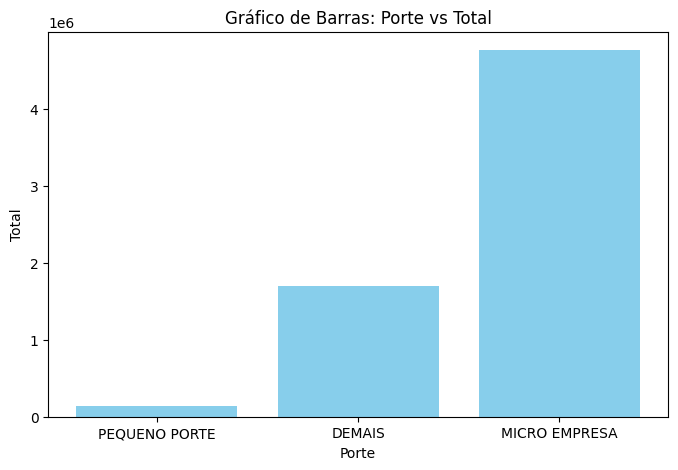

In [51]:

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df['porte'], df['total'], color='skyblue')
plt.xlabel('Porte')
plt.ylabel('Total')
plt.title('Gráfico de Barras: Porte vs Total')


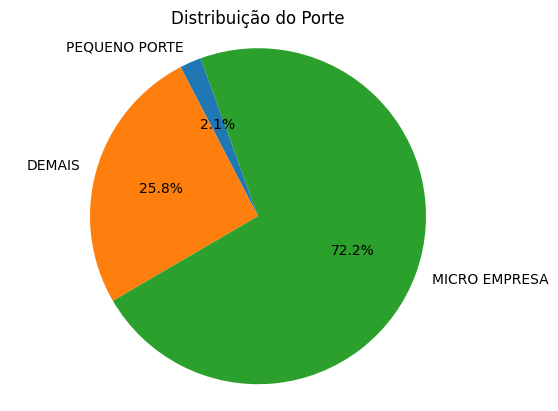

In [52]:
# Criando o gráfico de pizza
plt.pie(df['total'], labels=df['porte'], autopct='%1.1f%%', startangle=110)
plt.title('Distribuição do Porte')
plt.axis('equal')
plt.show()

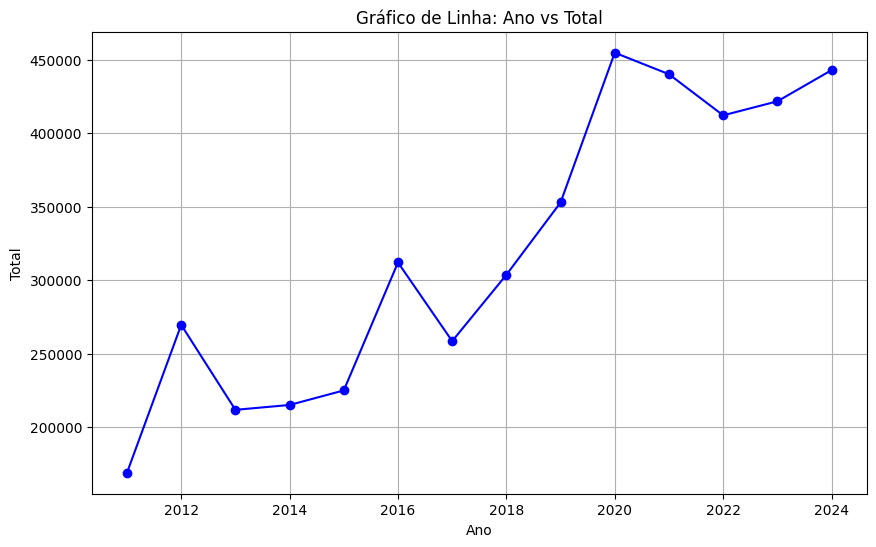

In [53]:
query = '''
        SELECT
            CAST(
                SUBSTRING(CAST(data_inicio_atividade AS VARCHAR), 1,4) AS INTEGER
            ) AS ano,
            COUNT(*) as total
    FROM silver_estabelecimento
    GROUP BY ALL
    ORDER BY 1
    '''
df = conn.execute(query).fetchdf()
df.head()

# Filtrando
df_filtrado = df[df['ano'] > 2010]

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_filtrado['ano'], df_filtrado['total'], marker='o', linestyle='-', color='b')
plt.xlabel('Ano')
plt.ylabel('Total')
plt.title('Gráfico de Linha: Ano vs Total')
plt.grid(True)


### Desconectar DuckDB

In [ ]:
comem = duckdb.connect()
conn.close()